<center><h1> Data Assessment</h1></center>


###### Ritu Ranjani Ravi Shankar

Importing the necessary libraries

In [1]:
import pandas as pd

import seaborn as sns
%pylab inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from nltk.corpus import stopwords

Populating the interactive namespace from numpy and matplotlib


Load the input file

In [2]:
# read the file with the data

df =pd.read_csv('Data_Banking.csv')

In [3]:
# Converting the date format 10-Mar-16 in the sheet to date format yyyy-mm-dd

df['date']= pd.to_datetime(df.post_date).dt.date

In [4]:
# extracting the year and month from the date format

df['month_year'] = pd.to_datetime(df.date).dt.to_period('M')

In [5]:
# check if the table is loaded correctly


df.head(1)

,Lead ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,date,month_year
0,308148,8535,12460,xxxx9928,Accommodation and Food Services,10-Mar-16,DEPOSIT ID NUMBER xx6836,credit,5000.0,5671.4,1,2016-03-10,2016-03


###### Basic Exploration of Data 

In [6]:
# Number of unique merchants in the dataset

print('Number of unique merchants in the dataset: ' ,df['Lead ID'].nunique())

# Number of unique bankids in the dataset

print('Number of unique bankids in the dataset: ' ,df['bankid'].nunique())

# Number of unique industry in the dataset

print('Number of unique Industry in the dataset: ', df['Industry'].nunique())

# Number of unique bank accounts in the dataset

print('Number of unique bank accounts in the dataset: ', df['bank_account_id'].nunique())

Number of unique merchants in the dataset:  21
Number of unique bankids in the dataset:  10
Number of unique Industry in the dataset:  10
Number of unique bank accounts in the dataset:  53


#### Exercise : 

<font size="2"><b> 1. Count the number of merchants, bank accounts and tabulate: </b>
</font>

<b> (i) the number of bank accounts for each merchant</b>



In [7]:

# group by lead id to count the number of unique bank accounts under each merchant
df1 = pd.DataFrame(df.groupby('Lead ID')['bank_account_id'].nunique()).reset_index()


###### [ans]  (i) The number of bank accounts for each merchant(Lead ID)

In [8]:
# rename the columns

df1.rename(columns= {'Lead ID':'Merchant','bank_account_id':'Number of Bank Accounts'})

,Merchant,Number of Bank Accounts
0,308148,1
1,310443,2
2,312745,5
3,313082,1
4,314036,1
5,314559,2
6,316728,6
7,318465,7
8,321146,2
9,321218,1



Question 1: 

###### (ii) the number of months of each bank account for which data is available



In [9]:
# group by bank account id to count the number of months of transaction data available

df_month = pd.DataFrame(df.groupby('bank_account_id')['month_year'].nunique()).reset_index()


###### [ans] (ii) the number of months of each bank account for which data is available

In [10]:
# rename the columns

df_month.rename(columns= {'bank_account_id':'Bank Account','month_year':'Number of Months'}).\
            sort_values('Number of Months',ascending = False)

,Bank Account,Number of Months
13,13234,13
36,14629,13
46,14981,13
43,14636,13
11,13232,13
48,15142,13
44,14637,13
45,14779,13
7,12839,13
35,14374,13


Question 1: 

###### (iii) the total number of credits (deposits), debits (withdrawals) and their averages per month for each bank account and each merchant


In [145]:
# using pivot table group based on bank account and merchant and count the number of credits and debits,and number of 
# unique months under credits and debits.

df_transac= pd.pivot_table(df,index=['bank_account_id','Lead ID'],\
                           columns='transaction_type',values=['amount','month_year'],\
                           aggfunc=({'amount':'count','month_year':lambda x: x.nunique()})).reset_index()


# renaming the columns to get rid of multi index
df_transac.columns = ['bank_account_id','Lead ID','Number_of_Credits','Number_of_debits','Credit_months','Debit_months']

In [12]:
# calculate the average # of credits per month and average # of debits per month

df_transac['average_credits'] = (df_transac['Number_of_Credits'])/(df_transac['Credit_months'])


df_transac['average_debits'] = (df_transac['Number_of_debits'])/(df_transac['Debit_months'])

###### [ans] (iii) the total number of credits (deposits), debits (withdrawals) and their averages per month for each bank account and each merchant

In [13]:
# display the number of credits, # of debits and average # of credits per month and average # of debits per month.
 # fill na to replace blank values with 0.

df_transac[['bank_account_id','Lead ID','Number_of_Credits','Number_of_debits','average_credits','average_debits']]\
.fillna(0).\
rename(columns = {'bank_account_id':'Bank Account','Lead ID': 'Merchant',\
                  'Number_of_Credits':'# of Credits','Number_of_debits':'# of Debits',\
                  'average_credits':'Avg # of Credit per month','average_debits':'Avg # of Debit per month'}).\
sort_values(['Bank Account','Merchant'],ascending=True)

,Bank Account,Merchant,# of Credits,# of Debits,Avg # of Credit per month,Avg # of Debit per month
0,12460,308148,172.0,320.0,17.200000,32.000000
1,12654,310443,27.0,223.0,3.857143,31.857143
2,12655,310443,8.0,23.0,1.333333,2.090909
3,12835,312745,7.0,11.0,1.750000,2.750000
4,12836,312745,3.0,5.0,1.500000,1.250000
5,12837,312745,1.0,0.0,1.000000,0.000000
6,12838,312745,35.0,47.0,3.500000,4.272727
7,12839,312745,114.0,537.0,8.769231,41.307692
8,13226,314036,276.0,1985.0,25.090909,180.454545
9,13228,316728,21.0,458.0,1.750000,38.166667


Question 1: 

###### (iv) the total dollar value of credits, debits and their averages per month for each bank account and each merchant

In [14]:
# group by bank account and Lead ID to sum the dolar amounts of credits and debits, 
# count the number of months to find average

df_amount = pd.pivot_table(df,index=['bank_account_id','Lead ID',],columns='transaction_type',\
                                   values=['amount','month_year']\
                                       ,aggfunc=({'amount':'sum','month_year':lambda x: x.nunique()})).reset_index()

In [15]:
# renaming the columns to get rid of multiindex names

df_amount.columns = ['bank_account_id','Lead ID','Credit_amount','Debit_amount','Credit_months','Debit_months']

In [16]:
# calculate the average credit amount per month and average debit amount per month

df_amount['Avg_creditpermonth'] = (df_amount['Credit_amount']/df_amount['Credit_months'])

df_amount['Avg_debitpermonth'] = (df_amount['Debit_amount']/df_amount['Debit_months'])

###### [ans] (iv) the total dollar value of credits, debits and their averages per month for each bank account and each merchant

In [17]:
# (iv) the total dollar value of credits, debits and their averages per month for each bank account and each merchant

df_amount[['bank_account_id','Lead ID','Credit_amount','Debit_amount','Avg_creditpermonth','Avg_debitpermonth']]\
.fillna(0).\
rename(columns = {'bank_account_id':'Bank Account','Lead ID': 'Merchant',\
                  'Credit_amount':'Total Credit amount','Debit_amount':'Total Debit amount',\
                  'Avg_creditpermonth':'Avg Credit per month','Avg_debitpermonth':'Avg Debit per month'}).\
sort_values(['Bank Account','Merchant'],ascending=True)


,Bank Account,Merchant,Total Credit amount,Total Debit amount,Avg Credit per month,Avg Debit per month
0,12460,308148,66611.03,61799.63,6661.103000,6179.963000
1,12654,310443,308732.78,328895.38,44104.682857,46985.054286
2,12655,310443,16400.44,17766.66,2733.406667,1615.150909
3,12835,312745,16054.00,16054.00,4013.500000,4013.500000
4,12836,312745,19055.79,19035.00,9527.895000,4758.750000
5,12837,312745,25.00,0.00,25.000000,0.000000
6,12838,312745,29957.00,29895.62,2995.700000,2717.783636
7,12839,312745,654346.10,648265.91,50334.315385,49866.608462
8,13226,314036,445920.11,432974.81,40538.191818,39361.346364
9,13228,316728,86542.04,86505.90,7211.836667,7208.825000



Question 1: 

###### (v) Aggregate the answers to (iii) and (iv) at the merchant level, industry level and bankid level

In [18]:
# aggregate based on lead id, bankid and industry 

df_indus = pd.pivot_table(df,index=['Lead ID','bankid','Industry'],\
                           columns='transaction_type',values=['amount','month_year']\
                          ,aggfunc=({'amount':'count','month_year':lambda x: x.nunique()})).reset_index()

# renaming columns
df_indus.columns = ['Lead ID','bankid','Industry','Number_of_Credits','Number_of_debits','Credit_months','Debit_months']

In [19]:
#calculating averages at merchant, industry and bankid level, # of credits/debits and their average

df_indus['average_credits'] = (df_indus['Number_of_Credits'])/(df_indus['Credit_months'])

df_indus['average_debits'] = (df_indus['Number_of_debits'])/(df_indus['Debit_months'])

In [20]:
# verify the calculation

df_indus.head(2)

,Lead ID,bankid,Industry,Number_of_Credits,Number_of_debits,Credit_months,Debit_months,average_credits,average_debits
0,308148,8535,Accommodation and Food Services,172,320,10,10,17.200000,32.0
1,310443,6192,Construction,35,246,9,12,3.888889,20.5


Extracting total credit amount, total debit amount, average credit amount and average debit amount at merchant, industry
and bankid level.


In [21]:
df_indamount = pd.pivot_table(df,index=['Lead ID','bankid','Industry'],columns='transaction_type',\
                                  values=['amount','month_year']\
               ,aggfunc=({'amount':'sum','month_year':lambda x: x.nunique()})).reset_index()

In [22]:
# renaming columns

df_indamount.columns = ['Lead ID','bankid','Industry','Credit_amount','Debit_amount','Credit_months','Debit_months']

In [23]:
# calculate the average amounts per month : credit and debit 

df_indamount['Avg_creditpermonth'] = (df_indamount['Credit_amount']/df_indamount['Credit_months'])
df_indamount['Avg_debitpermonth'] = (df_indamount['Debit_amount']/df_indamount['Debit_months'])

In [24]:
# verify the calculation

df_indamount.head()

,Lead ID,bankid,Industry,Credit_amount,Debit_amount,Credit_months,Debit_months,Avg_creditpermonth,Avg_debitpermonth
0,308148,8535,Accommodation and Food Services,66611.03,61799.63,10,10,6661.103000,6179.963000
1,310443,6192,Construction,325133.22,346662.04,9,12,36125.913333,28888.503333
2,312745,8544,"Professional, Scientific, and Technical Services",719437.89,713250.53,13,13,55341.376154,54865.425385
3,313082,8535,"Professional, Scientific, and Technical Services",547025.33,558877.28,10,10,54702.533000,55887.728000
4,314036,9966,Retail Trade,445920.11,432974.81,11,11,40538.191818,39361.346364


###### [ans]  (v) Aggregate the answers to (iii) and (iv) at the merchant level, industry level and bankid level

In [25]:
# join both the above tables to display the requested columns: 
# # of credits,  # of debits,  industry,  merchant , average # of credits, average # of debits, # average credit amount
# average debit amount per month.

pd.merge(df_indus, df_indamount,  how='inner', on=['Lead ID','bankid','Industry'])\
[['Lead ID','bankid','Industry','Number_of_Credits','Number_of_debits','Credit_amount','Debit_amount',\
 'average_credits','average_debits','Avg_creditpermonth','Avg_debitpermonth']]\
.fillna(0).rename(columns = {'Lead ID':'Merchant ID','bankid': 'Bank ID',\
                             'Number_of_Credits':'# of Credits','Number_of_debits':'# of Debits',\
                  'Credit_amount':'Total Credit amount','Debit_amount':'Total Debit amount',\
                'average_credits':'Avg # of Credit per month','average_debits':'Avg # of Debit per month',\
                  'Avg_creditpermonth':'Avg Credit amount per month','Avg_debitpermonth':'Avg Debit amount per month'}).\
sort_values(['Merchant ID','Bank ID'],ascending=True)

,Merchant ID,Bank ID,Industry,# of Credits,# of Debits,Total Credit amount,Total Debit amount,Avg # of Credit per month,Avg # of Debit per month,Avg Credit amount per month,Avg Debit amount per month
0,308148,8535,Accommodation and Food Services,172,320,66611.03,61799.63,17.200000,32.000000,6661.103000,6179.963000
1,310443,6192,Construction,35,246,325133.22,346662.04,3.888889,20.500000,36125.913333,28888.503333
2,312745,8544,"Professional, Scientific, and Technical Services",160,600,719437.89,713250.53,12.307692,46.153846,55341.376154,54865.425385
3,313082,8535,"Professional, Scientific, and Technical Services",112,1026,547025.33,558877.28,11.200000,102.600000,54702.533000,55887.728000
4,314036,9966,Retail Trade,276,1985,445920.11,432974.81,25.090909,180.454545,40538.191818,39361.346364
5,314559,8534,Information Technology,143,284,527617.92,519814.25,11.000000,23.666667,40585.993846,43317.854167
6,316728,8534,Construction,30,93,131836.82,125562.74,5.000000,11.625000,21972.803333,15695.342500
7,316728,8544,Construction,268,2221,2331182.81,2290280.80,22.333333,170.846154,194265.234167,176175.446154
8,318465,9262,Health Care and Social Assistance,369,1694,231848.55,229560.94,41.000000,188.222222,25760.950000,25506.771111
9,321146,10479,Retail Trade,121,454,105932.46,100592.42,13.444444,50.444444,11770.273333,11176.935556


Question 2 : 

###### Plot daily time series data for Lead ID - 318465 and bank_account_id = 13419

In [26]:
# extract the LeadId and bank account ID

df_filter1 = df[(df['Lead ID']==318465) & (df.bank_account_id==13419)]

In [27]:
# sort values based on date and transaction order

df_filter1 = df_filter1.sort_values(['date','trans_order'],ascending = True)

In [28]:
# group by date and transaction type to get the sum of credit and debit amounts per day.

df_trans1 = pd.DataFrame(df_filter1.groupby(['date','transaction_type'])['amount'].sum().reset_index())

In [29]:
# credit amounts and debit amounts

df_trans1.head()

,date,transaction_type,amount
0,2016-04-12,credit,793.26
1,2016-04-12,debit,44.44
2,2016-04-13,credit,737.30
3,2016-04-13,debit,975.95
4,2016-04-14,debit,97.34


In [30]:
# to get the running balance at the end of each day, get the max of the transaction order 

df_temp1 = pd.DataFrame(df_filter1.groupby(['date'])['trans_order'].max().reset_index())

In [31]:
df_temp1.head()

,date,trans_order
0,2016-04-12,5
1,2016-04-13,8
2,2016-04-14,4
3,2016-04-15,7
4,2016-04-16,7


In [32]:
# merge the max transaction order table with the original dataset to extract the running balance 
# amount corresponding to that transaction order.

xyz1 = pd.merge(df_filter1, df_temp1,  how='inner', on=['date','trans_order'])[['date','running_balance']]

In [33]:
# renaming the columns

xyz1 = xyz1.rename(columns = {'running_balance':'amount'})

In [34]:
# creating a new column to specify the category running balance

xyz1['transaction_type'] = 'running_balance'

In [35]:
xyz1 = xyz1[['date','transaction_type','amount']]

In [36]:
# union of both the tables with credit, debit amount and running balance amount to get the credit/debit/running balance
# amount for each day.

df_final1 = pd.concat([df_trans1,xyz1],ignore_index = False).sort_values(['date'],ascending = True)

In [37]:
df_final1.head()

,date,transaction_type,amount
0,2016-04-12,credit,793.26
0,2016-04-12,running_balance,587.52
1,2016-04-12,debit,44.44
2,2016-04-13,credit,737.30
1,2016-04-13,running_balance,348.87


###### [ans] Creating an interactive plot to display the daily time series data.

In [38]:
username = 'rravishankar'
api_key = 'lLY6mbM1zktKBEQ3DGVo'

chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

fig1 = px.line(df_final1, x="date", y="amount", color='transaction_type',\
              title="Lead ID=318465,bank_account_id=13419: Daily Time Series Plot")

py.plot(fig1,filename = 'TimeSeries_1',auto_open=False)
fig1.show()

######  Using Log scale for amounts as there is a spike on just one day which makes the plot not very intuitive.

In [39]:

fig11 = px.line(df_final1, x="date", y="amount", color='transaction_type',\
              title="Lead ID=318465,bank_account_id=13419: Daily Time Series Plot")

fig11.update_layout(yaxis_type="log")

py.plot(fig11,filename = 'TimeSeries_11',auto_open=False)

fig11.show()

Question : 

###### 2.1)  Plot daily time series data for Lead ID: 326062, bank_account_id : 14046

Following the same procedure as above


In [40]:
 # extract the LeadId and bank account ID

df_filter2 = df[(df['Lead ID']==326062) & (df.bank_account_id==14046)]

In [41]:
df_filter2 = df_filter2.sort_values(['date','trans_order'],ascending = True)

In [42]:
df_trans2 = pd.DataFrame(df_filter2.groupby(['date','transaction_type'])['amount'].sum().reset_index())

In [43]:
df_trans2.head()

,date,transaction_type,amount
0,2016-07-08,credit,1019.38
1,2016-07-11,credit,2867.82
2,2016-07-11,debit,2455.36
3,2016-07-12,credit,6486.36
4,2016-07-12,debit,4680.34


In [44]:
df_temp2 = pd.DataFrame(df_filter2.groupby(['date'])['trans_order'].max().reset_index())

In [45]:
df_temp2.head()

,date,trans_order
0,2016-07-08,1
1,2016-07-11,12
2,2016-07-12,8
3,2016-07-13,7
4,2016-07-14,6


In [46]:
xyz2 = pd.merge(df_filter2, df_temp2,  how='inner', on=['date','trans_order'])[['date','running_balance']]

In [47]:
xyz2 = xyz2.rename(columns = {'running_balance':'amount'})

In [48]:
xyz2['transaction_type'] = 'running_balance'

In [49]:
xyz2 = xyz2[['date','transaction_type','amount']]

In [50]:
df_final2 = pd.concat([df_trans2,xyz2],ignore_index = False).sort_values(['date'],ascending = True)

In [51]:
df_final2.head()

,date,transaction_type,amount
0,2016-07-08,credit,1019.38
0,2016-07-08,running_balance,1110.16
1,2016-07-11,credit,2867.82
2,2016-07-11,debit,2455.36
1,2016-07-11,running_balance,1522.62


###### [ans] Creating interactive plot using plot.ly


In [52]:
username = 'rravishankar'
api_key = 'lLY6mbM1zktKBEQ3DGVo'

chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

fig2 = px.line(df_final2, x="date", y="amount", color='transaction_type',\
              title="Lead ID=326062,bank_account_id=14046: Daily Time Series Plot")

py.plot(fig2,filename = 'TimeSeries_2',auto_open=False)
fig2.show()

Question 3 : 

###### For the merchants with the above Lead IDs, plot the withdrawals, deposits and daily balance as a daily time series 
(aggregate over all their bank accounts)

In [54]:
# extract the lead ID : 318465
df_merchant = df[(df['Lead ID']==318465)]

In [55]:
# sort by date and trans order

df_merchant = df_merchant.sort_values(['date','trans_order'],ascending = True)

In [56]:
# sum of credit and debit amounts aggregated to all bank accounts

df_trans3 = pd.DataFrame(df_merchant.groupby(['date','transaction_type'])['amount'].sum().reset_index())

In [57]:
df_trans3.head()

,date,transaction_type,amount
0,2016-04-12,credit,793.26
1,2016-04-12,debit,44.44
2,2016-04-13,credit,737.30
3,2016-04-13,debit,975.95
4,2016-04-14,debit,97.34


In [58]:
# find the max of trans order

df_temp3 = pd.DataFrame(df_merchant.groupby(['date','bank_account_id'])['trans_order'].max().reset_index())

In [59]:
df_temp3.head()

,date,bank_account_id,trans_order
0,2016-04-12,13419,5
1,2016-04-13,13419,8
2,2016-04-14,13419,4
3,2016-04-15,13419,7
4,2016-04-16,13419,7


In [60]:
# to aggregate on all bank accounts, extract the running balance at the end of the day for 
# each bank account and sum all of it together


xyz3 = pd.merge(df_merchant, df_temp3,  how='inner', on=['date','bank_account_id','trans_order'])\
[['date','bank_account_id','running_balance']]

In [61]:
xyz3.head()

,date,bank_account_id,running_balance
0,2016-04-12,13419,587.52
1,2016-04-13,13419,348.87
2,2016-04-14,13419,251.53
3,2016-04-15,13419,64.16
4,2016-04-16,13419,482.31


In [62]:
# sum the running balance for all bank accounts at the end of day.

xyz_grouped = xyz3.groupby(['date'])[['running_balance']].sum().reset_index()

In [63]:
xyz_grouped = xyz_grouped.rename(columns = {'running_balance':'amount'})

In [64]:
xyz_grouped.head()

,date,amount
0,2016-04-12,587.52
1,2016-04-13,348.87
2,2016-04-14,251.53
3,2016-04-15,64.16
4,2016-04-16,482.31


In [65]:
xyz_grouped['transaction_type'] = 'running_balance'

In [66]:
xyz_grouped = xyz_grouped[['date','transaction_type','amount']]

In [67]:
# merge both the above tables to get the credit amount, debit amount and running balance at the end of day for each date.

df_final3 = pd.concat([df_trans3,xyz_grouped],ignore_index = False).sort_values(['date'],ascending = True)

In [68]:
df_final3.head()

,date,transaction_type,amount
0,2016-04-12,credit,793.26
0,2016-04-12,running_balance,587.52
1,2016-04-12,debit,44.44
2,2016-04-13,credit,737.30
3,2016-04-13,debit,975.95


###### [ans] Create an interactive time series plot


In [69]:
username = 'rravishankar'
api_key = 'lLY6mbM1zktKBEQ3DGVo'

chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

fig3 = px.line(df_final3, x="date", y="amount", color='transaction_type',\
              title="Lead ID : 318465, Aggregated on all bank accounts")

py.plot(fig3,filename = 'TimeSeries_3',auto_open=False)
fig3.show()

###### Using Log scale for amounts as there is a spike on one day that skews the other data points on the plot

In [70]:

fig31 = px.line(df_final3, x="date", y="amount", color='transaction_type',\
              title="Lead ID : 318465, Aggregated on all bank accounts")

fig31.update_layout(yaxis_type="log")

py.plot(fig31,filename = 'TimeSeries_31',auto_open=False)

fig31.show()


###### Question 3 : 

######  Lead ID : 326062

Same procedure as above for Lead ID : 326062

In [72]:
# not filtering on bank accounts 

df_merchant1 = df[(df['Lead ID']==326062)]

In [73]:
df_merchant1 = df_merchant1.sort_values(['date','trans_order'],ascending = True)

In [74]:
df_trans4 = pd.DataFrame(df_merchant1.groupby(['date','transaction_type'])['amount'].sum().reset_index())

In [75]:
df_trans4.head()

,date,transaction_type,amount
0,2016-04-13,credit,1654.57
1,2016-04-13,debit,500.00
2,2016-04-14,credit,1028.15
3,2016-04-14,debit,4436.04
4,2016-04-15,credit,1086.10


In [76]:
df_temp4 = pd.DataFrame(df_merchant1.groupby(['date','bank_account_id'])['trans_order'].max().reset_index())

In [77]:
df_temp4.head()

,date,bank_account_id,trans_order
0,2016-04-13,14044,2
1,2016-04-14,14044,4
2,2016-04-15,14044,13
3,2016-04-18,14044,11
4,2016-04-19,14044,8


In [78]:
xyz4 = pd.merge(df_merchant1, df_temp4,  how='inner', on=['date','bank_account_id','trans_order'])\
[['date','bank_account_id','running_balance']]

In [79]:
xyz4.head()

,date,bank_account_id,running_balance
0,2016-04-13,14044,9829.82
1,2016-04-14,14044,6421.93
2,2016-04-15,14044,1661.98
3,2016-04-18,14044,2895.68
4,2016-04-19,14044,8512.40


In [80]:
xyz_grouped1 = xyz4.groupby(['date'])[['running_balance']].sum().reset_index()

In [81]:
xyz_grouped1 = xyz_grouped1.rename(columns = {'running_balance':'amount'})

In [82]:
xyz_grouped1.head()

,date,amount
0,2016-04-13,9829.82
1,2016-04-14,6421.93
2,2016-04-15,1661.98
3,2016-04-18,2895.68
4,2016-04-19,8512.40


In [83]:
xyz_grouped1['transaction_type'] = 'running_balance'

In [84]:
xyz_grouped1 = xyz_grouped1[['date','transaction_type','amount']]

In [85]:
df_final4 = pd.concat([df_trans4,xyz_grouped1],ignore_index = False).sort_values(['date'],ascending = True)

In [86]:
df_final4.head()

,date,transaction_type,amount
0,2016-04-13,credit,1654.57
1,2016-04-13,debit,500.00
0,2016-04-13,running_balance,9829.82
1,2016-04-14,running_balance,6421.93
2,2016-04-14,credit,1028.15


###### [ans] Creating interactive plot with plotly

In [87]:
username = 'rravishankar'
api_key = 'lLY6mbM1zktKBEQ3DGVo'

chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

fig4 = px.line(df_final4, x="date", y="amount", color='transaction_type',\
              title="Lead ID : 326062, Aggregated on all bank accounts")

py.plot(fig4,filename = 'TimeSeries_4',auto_open=False)
fig4.show()

 ###### Question 4 : 
 
  The cash flow of a business has many dimensions [for example, top 5 deposits/Total deposits, 
 average # of days between two withdrawals, coefficient of variation of the daily balance]
that are potentially relevant to a borrower’s ability to repay. 

###### 4.1 Can you obtain the value of these variables for each merchant? 

###### 4.2 What other cash flow variables can you hypothesize that could be relevant for predicting merchant default?

In [89]:
 # average # of days between two withdrawals,

# extract the withdrawals information and sort by Lead ID and date

df_copy = df[df['transaction_type']=='debit'][['Lead ID','date']].sort_values(['Lead ID','date'],ascending = True)

In [90]:
df_copy.head()

,Lead ID,date
3,308148,2016-03-21
4,308148,2016-03-22
5,308148,2016-03-23
6,308148,2016-03-24
7,308148,2016-03-24


In [91]:
# calculate the day diff by subtracting the first withdrawal date with the second withdrawal date.

df_copy['day_diff']=df_copy.groupby('Lead ID')['date']\
                            .apply(lambda x: (x.shift(-1)-x).dt.days)

In [92]:
# Average # of days between each withdrawls

df_avg = pd.DataFrame((df_copy.groupby('Lead ID')['day_diff'].sum())/(df_copy.groupby('Lead ID')['day_diff'].count())).reset_index()

In [93]:
df_avg.head()

,Lead ID,day_diff
0,308148,0.802508
1,310443,1.387755
2,312745,0.607679
3,313082,0.259512
4,314036,0.157762


In [94]:
# Coefficient of variation of daily balance
# Standard deviation/mean of the running balance for each merchant

df_coeff = pd.DataFrame((df.groupby('Lead ID')['running_balance'].std())/(df.groupby('Lead ID')['running_balance'].mean())).reset_index()

df_coeff.head()

,Lead ID,running_balance
0,308148,0.897563
1,310443,0.901195
2,312745,0.820833
3,313082,0.996139
4,314036,1.088275


In [95]:
# top 5 deposits/total deposits - percentage of top 5 deposits.

df_top5 = pd.DataFrame(df[df['transaction_type']=='credit'].groupby('Lead ID')['amount'].nlargest(5)).\
                reset_index().drop('level_1',axis=1)
                 

In [96]:
# sum of top 5 deposits of each merchant

df_total = pd.DataFrame(df_top5.groupby('Lead ID')['amount'].sum())

In [97]:
# total deposits of each merchant

x = pd.DataFrame(df[df['transaction_type']=='credit'].groupby('Lead ID')['amount'].sum())

In [98]:
# top 5 deposits/Total Deposits for each merchant 

df_amt = pd.DataFrame(df_total['amount']/x.amount).reset_index()

In [99]:
df_amt.head()

,Lead ID,amount
0,308148,0.382988
1,310443,0.606671
2,312745,0.149010
3,313082,0.147780
4,314036,0.169396


 Merge all three columns to get the X variables corresponding to each merchant

###### [ans] Avg number of days between two withdrawals, coefficient of variation of daily balance, top5/total deposits



In [100]:
pd.merge(pd.merge(df_avg,df_coeff,on='Lead ID'),df_amt,on='Lead ID').\
rename(columns = {'day_diff':'Avg # days between two withdrawals','Lead ID': 'Merchant',\
                  'running_balance':'Coefficient of variation of daily balance','amount':'Top 5 deposits/Total Deposits'})

,Merchant,Avg # days between two withdrawals,Coefficient of variation of daily balance,Top 5 deposits/Total Deposits
0,308148,0.802508,0.897563,0.382988
1,310443,1.387755,0.901195,0.606671
2,312745,0.607679,0.820833,0.149010
3,313082,0.259512,0.996139,0.147780
4,314036,0.157762,1.088275,0.169396
5,314559,1.187279,0.826293,0.132420
6,316728,0.151751,1.386293,0.216526
7,318465,0.145895,1.410154,0.174407
8,321146,0.490066,19.688895,0.342832
9,321218,0.398585,1.157435,0.495735


###### Question 4.2

What other cash flow variables can you hypothesize that could be relevant for predicting merchant default?

###### Ans : 



Number of loans currently availed, Number of deposits, Number of withdrawals, average credit amount per month, average debit amount per month, frequency of overdraft in the merchant’s account(negative balance in account), age of the oldest bank accounts, total number of bank accounts under each merchant, number of payment defaults in the past one year.

In addition to this, knowledge about the merchant’s business would also be helpful. Thus : 
 
Annual revenue of the merchant, number of customers the merchant has, annual tax details, Earnings before interest and taxes (EBIT), operating cost(expenditure to run the business) could add value to the prediction.

###### Question 5 : 

Develop a program by which clusters of similar transactions for a merchant can be identified from transaction descriptions and other information

###### [ans] 


###### 1) Assigning topics to transaction description using LDA model (Topic Modeling).


###### 2) Further use the identified topics to perfrom KMeans clustering to group transactions based on amount, topic of transaction details, transaction type and industries.


In [101]:
# import stop words

import nltk; nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ritur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
# define NLTK Stop words 

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [103]:
# check the description column

df['description'].head()

0                             DEPOSIT ID NUMBER xx6836
1    ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...
2    ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...
3                 WAL-MART #0880 IRVING TXxx6007 03/20
4              CHECK OR SUPPLY ORDERPPD ID: xxxxxx6800
Name: description, dtype: object

###### Data Preprocessing

In [104]:
# Convert the description column to list
data = df.description.values.tolist()

# convert to lower case
data = [sent.lower() for sent in data]

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove numbers
data = [re.sub('[0-9?|$|''.|!/*:#-]','' ,sent) for sent in data]

# remove encoded account number XXXX to X
data = [re.sub('([Xx])\w+', 'x',sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("[']", '', sent) for sent in data]

# Remove new line characters
data = [re.sub(r'\s+',' ', sent) for sent in data]


# check for the preprocessing
data[:10]

['deposit id number x',
 'atm cash deposit n belt line rd irving tx',
 'atm cash deposit n belt line rd irving tx',
 'walmart irving tx ',
 'check or supply orderppd id x',
 'dollartree league city tx ',
 'oreilly auto x seabrooktx ',
 'withdrawal',
 'wm supercenter walm league city tx ',
 'walmart super center friendswood tx x ']

Using the in-bulit gensim package to remove punctions and perform sentence to word transformation for each row of description 

In [105]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

# check the sentence to word transformation

print(data_words[:2])

[['deposit', 'id', 'number'], ['atm', 'cash', 'deposit', 'belt', 'line', 'rd', 'irving', 'tx']]


In [106]:
# remove stop words - defining a function to remove stop words from each row of description

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [107]:
# words/sentences without stopwords

data_words_nostops[:2]

[['deposit', 'id', 'number'],
 ['atm', 'cash', 'deposit', 'belt', 'line', 'rd', 'irving', 'tx']]

In [108]:
# Create Dictionary of word corpus

id2word = corpora.Dictionary(data_words_nostops)

# Create Corpus

texts = data_words_nostops


# Term Document Frequency

corpus = [id2word.doc2bow(text) for text in texts]

# verify the conversion

print(corpus[:5])

[[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(6, 1), (9, 1), (10, 1)], [(1, 1), (11, 1), (12, 1), (13, 1)]]


In [109]:
# make it into a human readable form rather than vectors

[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

[[('deposit', 1), ('id', 1), ('number', 1)],
 [('deposit', 1),
  ('atm', 1),
  ('belt', 1),
  ('cash', 1),
  ('irving', 1),
  ('line', 1),
  ('rd', 1),
  ('tx', 1)]]

###### Building the LDA Model


In [110]:
# Build LDA model with the corpus and word dictionary , with number of topics as 7


lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=0,
                                           passes=10,
                                           alpha='auto')

In [111]:
# checking the model output : 

# the keywords and distribution value for each keyword for topic # - 5 

lda_model.show_topic(5)

[('inc', 0.23125966),
 ('club', 0.051430415),
 ('idx', 0.049309082),
 ('usd', 0.031137023),
 ('indnthe', 0.025146138),
 ('idwfbt', 0.025146138),
 ('breakfast', 0.025146138),
 ('desbkcd', 0.024470687),
 ('stlmt', 0.024470687),
 ('sams', 0.02261074)]

In [112]:
# printing the keywords in each topic

for topic_id in range(lda_model.num_topics):
    topk = lda_model.show_topic(topic_id, 10)
    topk_words = [ w for w, _ in topk ]
    
    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

0: deposit transfer online wire associate janabi banking chk enterprises confirmation
1: withdrawal id co worldpay trf idlkx desdep riverside gas lake
2: ca checkcard purchase card wa authorized central sx paypal orlando
3: atm deposit cash payment ky louisville card station pos vape
4: ach persona dep ccd bankcard pmt doctorsauthor id shaban shevan
5: inc club idx usd indnthe idwfbt breakfast desbkcd stlmt sams
6: check new doctors newlogic preauthpmt logic paid fee persona flower


###### Model Perfromance

In [113]:
# Compute Perplexity

print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_nostops, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.690992137939829

Coherence Score:  0.4524798675896142


###### Identify the optimum number of topics using elbow method 

In [114]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics,
                                            random_state=0,
                                           alpha='auto')
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [115]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_nostops, start=2, limit=25, step=2)

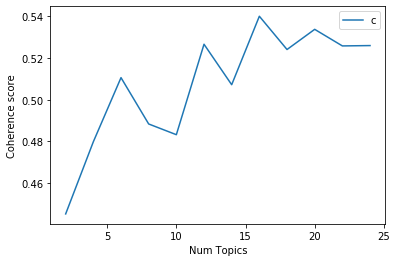

In [116]:
# Show graph

limit=25; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [117]:
# taking the optimum number of topics as 6 from the below.

# Print the coherence scores

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4451
Num Topics = 4  has Coherence Value of 0.4798
Num Topics = 6  has Coherence Value of 0.5106
Num Topics = 8  has Coherence Value of 0.4883
Num Topics = 10  has Coherence Value of 0.4832
Num Topics = 12  has Coherence Value of 0.5266
Num Topics = 14  has Coherence Value of 0.5072
Num Topics = 16  has Coherence Value of 0.5401
Num Topics = 18  has Coherence Value of 0.5241
Num Topics = 20  has Coherence Value of 0.5338
Num Topics = 22  has Coherence Value of 0.5258
Num Topics = 24  has Coherence Value of 0.526


In [118]:
optimal_model = model_list[2]

In [119]:
# print the keywords associated with each of the 6 topics

for topic_id in range(optimal_model.num_topics):
    topk = optimal_model.show_topic(topic_id, 10)
    topk_words = [ w for w, _ in topk ]
    
    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

0: deposit transfer online wa associate janabi wire banking chk confirmation
1: withdrawal id co worldpay trf idlkx desdep cash riverside card
2: check ca checkcard purchase fee mi shoppe card item fl
3: atm paid electronic station payment rd proc st douglas quickpay
4: ach persona dep bankcard ccd pmt doctorsauthor btot shevan shaban
5: inc new wire preauthpmt newlogic logic doctors associate janabi club


###### Finding the dominant topic in each transaction description

In [120]:
# define a function to calculate the dominant topic number for each description

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)






In [121]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=df['description'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()

# rename columns
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [122]:
# add amount, industry and transaction type to the LDA output.

df_dominant_topic['industry'] = (df['Industry'])

df_dominant_topic['transaction_type'] = (df['transaction_type'])

df_dominant_topic['amount'] = (df['amount'])

In [123]:
# verify

df_dominant_topic.head(6)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,industry,transaction_type,amount
0,0,0.0,0.5591,"deposit, transfer, online, wa, associate, jana...",DEPOSIT ID NUMBER xx6836,Accommodation and Food Services,credit,5000.00
1,1,3.0,0.6385,"atm, paid, electronic, station, payment, rd, p...",ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,Accommodation and Food Services,credit,16.00
2,2,3.0,0.6385,"atm, paid, electronic, station, payment, rd, p...",ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,Accommodation and Food Services,credit,1000.00
3,3,5.0,0.4106,"inc, new, wire, preauthpmt, newlogic, logic, d...",WAL-MART #0880 IRVING TXxx6007 03/20,Accommodation and Food Services,debit,1015.50
4,4,5.0,0.3113,"inc, new, wire, preauthpmt, newlogic, logic, d...",CHECK OR SUPPLY ORDERPPD ID: xxxxxx6800,Accommodation and Food Services,debit,27.62
5,5,2.0,0.7877,"check, ca, checkcard, purchase, fee, mi, shopp...",DOLLARTREE LEAGUE CITY TXxx0062 03/23,Accommodation and Food Services,debit,3.24


In [124]:
# create a copy of the dataframe to perform clustering

df_tr=df_dominant_topic

In [125]:
# convert the topic number to category

df_tr['Dominant_Topic'] = df_tr['Dominant_Topic'].astype('category')

In [126]:
# convert to categories into dummies(one-hot encoding)

df_tr = pd.get_dummies(df_tr, columns=['industry','transaction_type','Dominant_Topic'])

In [127]:
df_tr.head()

,Document_No,Topic_Perc_Contrib,Keywords,Text,amount,industry_Accommodation and Food Services,"industry_Agriculture, Forestry, Fishing and Hunting",industry_Construction,industry_Educational Services,industry_Finance and Insurance,...,"industry_Professional, Scientific, and Technical Services",industry_Retail Trade,transaction_type_credit,transaction_type_debit,Dominant_Topic_0.0,Dominant_Topic_1.0,Dominant_Topic_2.0,Dominant_Topic_3.0,Dominant_Topic_4.0,Dominant_Topic_5.0
0,0,0.5591,"deposit, transfer, online, wa, associate, jana...",DEPOSIT ID NUMBER xx6836,5000.00,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0.6385,"atm, paid, electronic, station, payment, rd, p...",ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,16.00,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2,0.6385,"atm, paid, electronic, station, payment, rd, p...",ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,1000.00,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,0.4106,"inc, new, wire, preauthpmt, newlogic, logic, d...",WAL-MART #0880 IRVING TXxx6007 03/20,1015.50,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,4,0.3113,"inc, new, wire, preauthpmt, newlogic, logic, d...",CHECK OR SUPPLY ORDERPPD ID: xxxxxx6800,27.62,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [128]:
from sklearn.cluster import KMeans

In [129]:
X = df_tr[['amount',
       'industry_Accommodation and Food Services',
       'industry_Agriculture, Forestry, Fishing and Hunting',
       'industry_Construction', 'industry_Educational Services',
       'industry_Finance and Insurance',
       'industry_Health Care and Social Assistance',
       'industry_Information Technology',
       'industry_Other Services (except Public Administration)',
       'industry_Professional, Scientific, and Technical Services',
       'industry_Retail Trade', 'transaction_type_credit',
       'transaction_type_debit', 'Dominant_Topic_0.0', 'Dominant_Topic_1.0',
       'Dominant_Topic_2.0', 'Dominant_Topic_3.0', 'Dominant_Topic_4.0',
       'Dominant_Topic_5.0']]

Assigning lower weights to transaction type, industries. Thus giving more weightage to the description(topics) column while performing clustering

In [130]:
X['transaction_type_credit_weighted'] = X['transaction_type_credit']*0.25
X['transaction_type_debit_weighted'] = X['transaction_type_debit']*0.25
X['industry_Accommodation and Food Services_weighted'] = X['industry_Accommodation and Food Services']*0.25
X['industry_Agriculture, Forestry, Fishing and Hunting_weighted'] = X['industry_Agriculture, Forestry, Fishing and Hunting']*0.25
X['industry_Construction_weighted'] = X['industry_Construction']*0.25
X['industry_Educational Services_weighted'] = X['industry_Educational Services']*0.25
X['industry_Finance and Insurance_weighted'] = X['industry_Finance and Insurance']*0.25
X['industry_Health Care and Social Assistance_weighted'] = X['industry_Health Care and Social Assistance']*0.25
X['industry_Information Technology_weighted'] = X['industry_Information Technology']*0.25
X['industry_Other Services (except Public Administration)_weighted'] = X['industry_Other Services (except Public Administration)']*0.25
X['industry_Professional, Scientific, and Technical Services_weighted'] = X['industry_Professional, Scientific, and Technical Services']*0.25
X['industry_Retail Trade_weighted'] = X['industry_Retail Trade']*0.25


In [131]:
X.head()

,amount,industry_Accommodation and Food Services,"industry_Agriculture, Forestry, Fishing and Hunting",industry_Construction,industry_Educational Services,industry_Finance and Insurance,industry_Health Care and Social Assistance,industry_Information Technology,industry_Other Services (except Public Administration),"industry_Professional, Scientific, and Technical Services",...,industry_Accommodation and Food Services_weighted,"industry_Agriculture, Forestry, Fishing and Hunting_weighted",industry_Construction_weighted,industry_Educational Services_weighted,industry_Finance and Insurance_weighted,industry_Health Care and Social Assistance_weighted,industry_Information Technology_weighted,industry_Other Services (except Public Administration)_weighted,"industry_Professional, Scientific, and Technical Services_weighted",industry_Retail Trade_weighted
0,5000.00,1,0,0,0,0,0,0,0,0,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.00,1,0,0,0,0,0,0,0,0,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000.00,1,0,0,0,0,0,0,0,0,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1015.50,1,0,0,0,0,0,0,0,0,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.62,1,0,0,0,0,0,0,0,0,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
# standardization of the amount column(x-mean/sigma)

X['amt'] = (((X['amount'])-(X['amount'].mean()))/(X['amount'].std()))

In [133]:
# new dataframe with the weighted and standardized columns

X_weighted = X[['Dominant_Topic_0.0', 'Dominant_Topic_1.0',
       'Dominant_Topic_2.0', 'Dominant_Topic_3.0', 'Dominant_Topic_4.0',
       'Dominant_Topic_5.0', 'amt', 'transaction_type_credit_weighted',
       'transaction_type_debit_weighted',
       'industry_Accommodation and Food Services_weighted',
       'industry_Agriculture, Forestry, Fishing and Hunting_weighted',
       'industry_Construction_weighted',
       'industry_Educational Services_weighted',
       'industry_Finance and Insurance_weighted',
       'industry_Health Care and Social Assistance_weighted',
       'industry_Information Technology_weighted',
       'industry_Other Services (except Public Administration)_weighted',
       'industry_Professional, Scientific, and Technical Services_weighted',
       'industry_Retail Trade_weighted']]

In [135]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++',max_iter=600,random_state=0)

# fitting the k means algorithm on scaled data
kmeans.fit(X_weighted)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0, 0.5, 'Inertia')

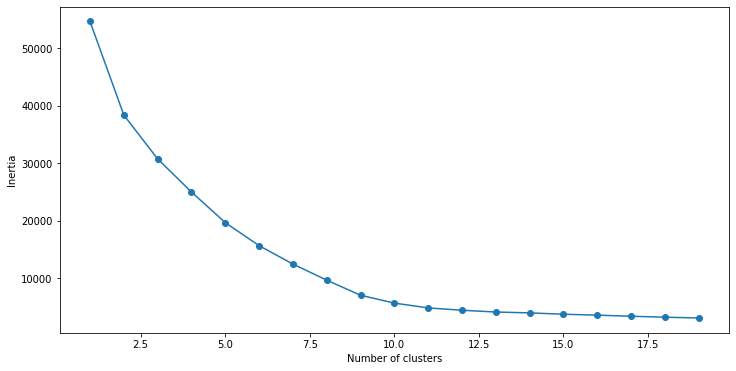

In [136]:
# elbow method

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++',random_state=0)
    kmeans.fit(X_weighted)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [137]:
from kneed import DataGenerator, KneeLocator

In [138]:
kl = KneeLocator(
   range(1,20), SSE, curve="convex", direction="decreasing"
   )

In [139]:
kl.elbow

7

In [140]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=8, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(X_weighted)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [141]:
pred = kmeans.predict(X_weighted)

In [142]:
frame = pd.DataFrame(X_weighted)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    8718
4    6518
5    4226
3    3495
6    2827
2    2482
1     761
7       2
Name: cluster, dtype: int64

In [143]:
df_cluster = pd.concat([df, frame['cluster']], axis=1)

In [144]:
df_cluster.head() #the cluster column provides the final group of the transactions

,Lead ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,date,month_year,cluster
0,308148,8535,12460,xxxx9928,Accommodation and Food Services,10-Mar-16,DEPOSIT ID NUMBER xx6836,credit,5000.00,5671.40,1,2016-03-10,2016-03,5
1,308148,8535,12460,xxxx9928,Accommodation and Food Services,21-Mar-16,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,16.00,5687.40,1,2016-03-21,2016-03,3
2,308148,8535,12460,xxxx9928,Accommodation and Food Services,21-Mar-16,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,1000.00,5671.90,3,2016-03-21,2016-03,3
3,308148,8535,12460,xxxx9928,Accommodation and Food Services,21-Mar-16,WAL-MART #0880 IRVING TXxx6007 03/20,debit,1015.50,4671.90,2,2016-03-21,2016-03,2
4,308148,8535,12460,xxxx9928,Accommodation and Food Services,22-Mar-16,CHECK OR SUPPLY ORDERPPD ID: xxxxxx6800,debit,27.62,5644.28,1,2016-03-22,2016-03,2


In [ ]:
df_cluster.to_csv('C:\Python - Data analytics\Data Assessment\data cluster_weighted.csv',index=False)